In [ ]:
from google.colab import files
uploaded = files.upload()


Saving country_wise_latest.csv to country_wise_latest.csv


In [ ]:
import io, pandas as pd

fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head(8)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe


In [ ]:
print("Shape (rows, columns):", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Shape (rows, columns): (187, 15)

Columns:
['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


In [ ]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
n_rows, n_cols = df.shape
num_cols = df.select_dtypes(include='number').shape[1]
cat_cols = df.select_dtypes(include='object').shape[1]
missing = df.isnull().sum()

summary = f"""
Dataset Summary:
- Rows: {n_rows}
- Columns: {n_cols} (Numeric: {num_cols}, Text: {cat_cols})
- Numeric columns (sample): {list(df.select_dtypes(include='number').columns)[:6]}
- Text columns (sample): {list(df.select_dtypes(include='object').columns)[:6]}
- Missing values (non-zero only): {dict(missing[missing>0])}
"""
print(summary)



Dataset Summary:
- Rows: 187
- Columns: 15 (Numeric: 13, Text: 2)
- Numeric columns (sample): ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']
- Text columns (sample): ['Country/Region', 'WHO Region']
- Missing values (non-zero only): {}



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("First 8 rows:")
display(df.head(8))
print("\nCurrent dtypes and non-null counts:")
df.info()


First 8 rows:


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe



Current dtypes and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO R

In [ ]:

df.columns = [c.strip().replace(' ', '_').replace('%','pct').lower() for c in df.columns]
print("Columns now:")
print(df.columns.tolist())


Columns now:
['country/region', 'confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'confirmed_last_week', '1_week_change', '1_week_pct_increase', 'who_region']


In [ ]:

candidates = ['confirmed','deaths','recovered','active','new_cases','new_deaths','new_recovered']
present = [c for c in candidates if c in df.columns]
print("Numeric candidates found:", present)
for c in present:
    print(f"\nSample values for {c}:")
    print(df[c].head(10).tolist())


Numeric candidates found: ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

Sample values for confirmed:
[36263, 4880, 27973, 907, 950, 86, 167416, 37390, 15303, 20558]

Sample values for deaths:
[1269, 144, 1163, 52, 41, 3, 3059, 711, 167, 713]

Sample values for recovered:
[25198, 2745, 18837, 803, 242, 65, 72575, 26665, 9311, 18246]

Sample values for active:
[9796, 1991, 7973, 52, 667, 18, 91782, 10014, 5825, 1599]

Sample values for new_cases:
[106, 117, 616, 10, 18, 4, 4890, 73, 368, 86]

Sample values for new_deaths:
[10, 6, 8, 0, 1, 0, 120, 6, 6, 1]

Sample values for new_recovered:
[18, 63, 749, 0, 0, 5, 2057, 187, 137, 37]


In [ ]:


def clean_numeric_series(s):
    s = s.astype(str).str.replace(r'[,+]', '', regex=True)
    s = s.replace(['', 'nan', 'None', 'NA', 'NaN'], np.nan)
    return pd.to_numeric(s, errors='coerce')

numeric_cols = []
for col in df.columns:

    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric_cols.append(col)
    else:

        sample = df[col].dropna().astype(str).head(50).tolist()
        digits_like = sum(1 for v in sample if v.replace(',','').replace('+','').replace('.','').lstrip('-').isdigit())
        if digits_like >= min(5, len(sample)):
            numeric_cols.append(col)

print("Columns considered numeric before cleaning:", numeric_cols)

for col in numeric_cols:
    df[col] = clean_numeric_series(df[col])

print("\nAfter conversion, dtypes are:")
print(df[numeric_cols].dtypes)
print("\nMissing counts for numeric columns:")
print(df[numeric_cols].isnull().sum())


Columns considered numeric before cleaning: ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases', 'recovered_/_100_cases', 'deaths_/_100_recovered', 'confirmed_last_week', '1_week_change', '1_week_pct_increase']

After conversion, dtypes are:
confirmed                   int64
deaths                      int64
recovered                   int64
active                      int64
new_cases                   int64
new_deaths                  int64
new_recovered               int64
deaths_/_100_cases        float64
recovered_/_100_cases     float64
deaths_/_100_recovered    float64
confirmed_last_week         int64
1_week_change               int64
1_week_pct_increase       float64
dtype: object

Missing counts for numeric columns:
confirmed                 0
deaths                    0
recovered                 0
active                    0
new_cases                 0
new_deaths                0
new_recovered             0
deaths_/_

In [ ]:

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing': missing, 'missing_pct': missing_pct})
missing_df = missing_df[missing_df['missing'] > 0].sort_values('missing_pct', ascending=False)
print("Columns with missing values (count and %):")
display(missing_df)

if 'active' in df.columns:
    mask = df['active'].isnull() & df['confirmed'].notnull()
    df.loc[mask, 'active'] = df.loc[mask, 'confirmed'] - df.loc[mask, ['deaths','recovered']].sum(axis=1)
for c in ['new_cases','new_deaths','new_recovered']:
    if c in df.columns:
        df[c] = df[c].fillna(0)

print("Filled some active/new_ columns where applicable.")


Columns with missing values (count and %):


,missing,missing_pct


Filled some active/new_ columns where applicable.


In [ ]:
dup_count = df.duplicated().sum()
print("Duplicate rows found:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates to remove.")


Duplicate rows found: 0
No duplicates to remove.


FileNotFoundError: [Errno 2] No such file or directory: 'images/python/confirm_dist.png'

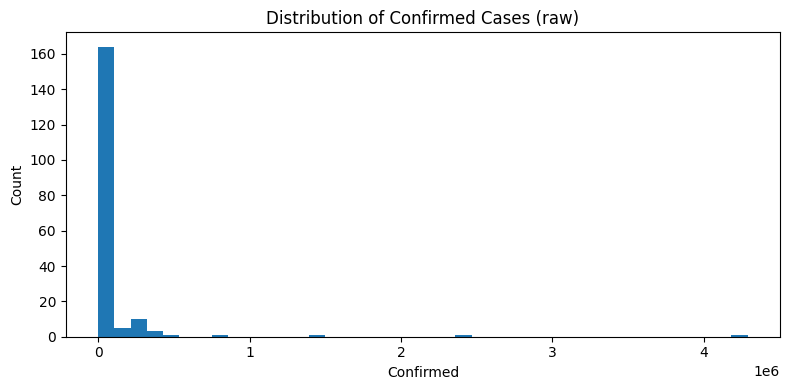

In [ ]:

plt.figure(figsize=(8,4))
plt.hist(df['confirmed'].dropna(), bins=40)
plt.title('Distribution of Confirmed Cases (raw)')
plt.xlabel('Confirmed')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/python/confirm_dist.png', dpi=150)
plt.show()

if 'country' in df.columns:
    top10 = df.nlargest(10, 'confirmed')
    plt.figure(figsize=(10,5))
    sns.barplot(data=top10, x='country', y='confirmed')
    plt.xticks(rotation=45)
    plt.title('Top 10 Countries by Confirmed Cases')
    plt.tight_layout()
    plt.savefig('images/python/top10_confirmed.png', dpi=150)
    plt.show()

print("Saved confirm_dist.png and top10_confirmed.png to images/python/")


In [ ]:

n_rows, n_cols = df.shape
numeric_count = df.select_dtypes(include='number').shape[1]
print("CLEANING LOG SUMMARY")
print("---------------------")
print("Rows:", n_rows)
print("Columns:", n_cols)
print("Numeric columns:", numeric_count)
print("\nMissing values after cleaning (non-zero):")
print(df.isnull().sum()[df.isnull().sum() > 0])


CLEANING LOG SUMMARY
---------------------
Rows: 187
Columns: 15
Numeric columns: 13

Missing values after cleaning (non-zero):
Series([], dtype: int64)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_country_wise_latest.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_country_wise_latest.csv'

In [ ]:
import pandas as pd, io

fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head(8)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (187, 15)
Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


Text(0.5, 1.0, 'Top 10 Countries by Confirmed COVID-19 Cases')

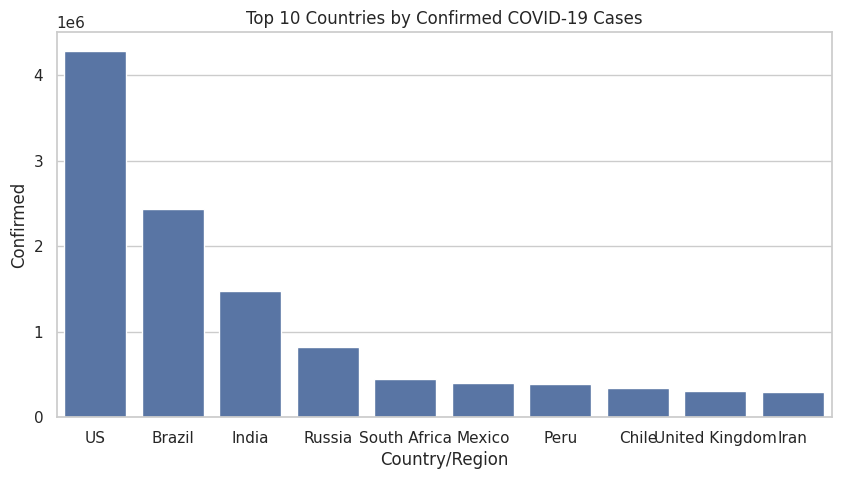

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


country_col = 'Country/Region'
confirmed_col = 'Confirmed'

top10 = df.nlargest(10, confirmed_col)

plt.figure(figsize=(10,5))
sns.barplot(x=country_col, y=confirmed_col, data=top10)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')


/tmp/ipython-input-4288805219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_col, y=deaths_col, data=top10_deaths, palette='Reds')


FileNotFoundError: [Errno 2] No such file or directory: 'images/python/analysis_top10_deaths.png'

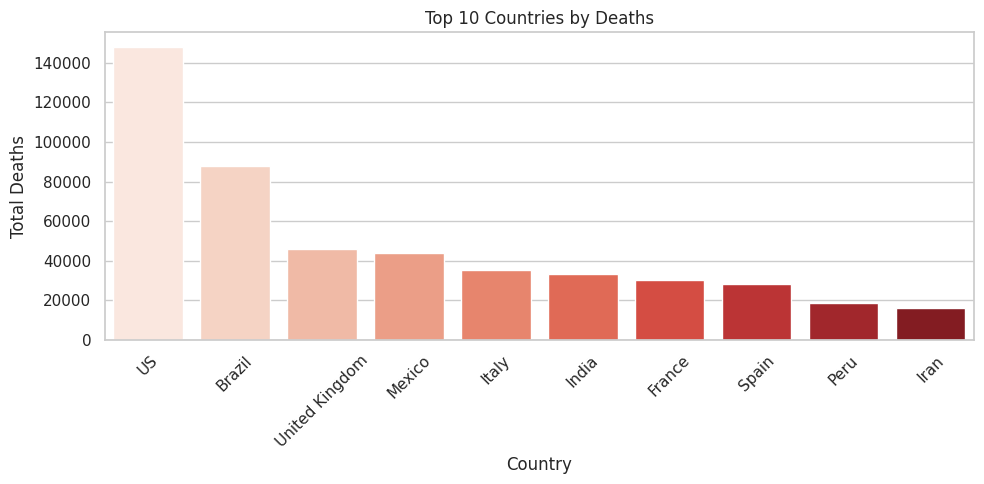

In [ ]:
deaths_col = 'Deaths'

top10_deaths = df.nlargest(10, deaths_col)

plt.figure(figsize=(10,5))
sns.barplot(x=country_col, y=deaths_col, data=top10_deaths, palette='Reds')
plt.title('Top 10 Countries by Deaths')
plt.xticks(rotation=45)
plt.ylabel('Total Deaths')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('images/python/analysis_top10_deaths.png', dpi=150)
plt.show()


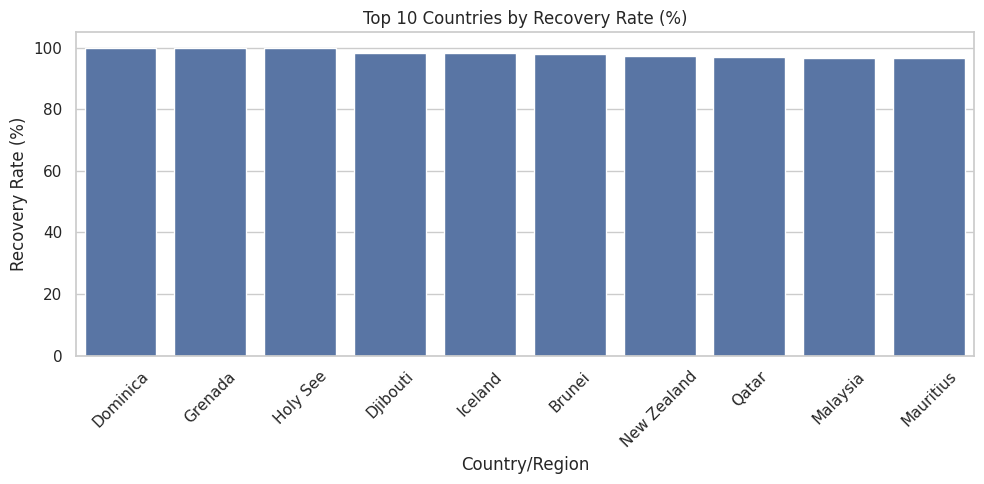

In [ ]:
recovery_rate_col = 'Recovery Rate (%)'
country_col = 'Country/Region'

df[recovery_rate_col] = (df['Recovered']/df['Confirmed'])*100
top10 = df.nlargest(10, recovery_rate_col)

plt.figure(figsize=(10,5))
sns.barplot(x=country_col, y=recovery_rate_col, data=top10)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Recovery Rate (%)')
plt.tight_layout(); plt.show()


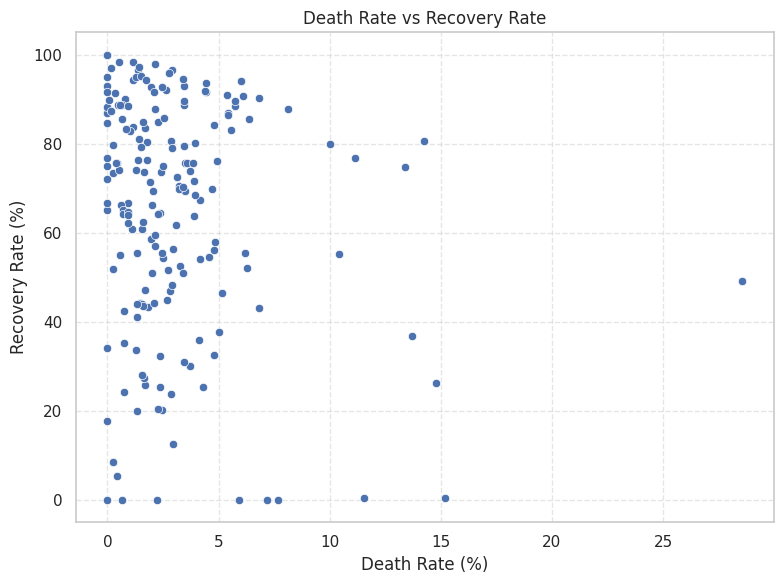

In [ ]:
df['Death Rate (%)'] = (df['Deaths']/df['Confirmed'])*100

plt.figure(figsize=(8,6))
sns.scatterplot(x='Death Rate (%)', y='Recovery Rate (%)', data=df)
plt.title('Death Rate vs Recovery Rate')
plt.xlabel('Death Rate (%)'); plt.ylabel('Recovery Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(); plt.show()


In [ ]:
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()

print("Total Confirmed :", total_confirmed)
print("Total Deaths :", total_deaths)
print("Total Recovered :", total_recovered)
print("Death Rate (%) = ", round((total_deaths/total_confirmed)*100, 2))
print("Recovery Rate (%) = ", round((total_recovered/total_confirmed)*100, 2))


Total Confirmed : 16480485
Total Deaths : 654036
Total Recovered : 9468087
Death Rate (%) =  3.97
Recovery Rate (%) =  57.45


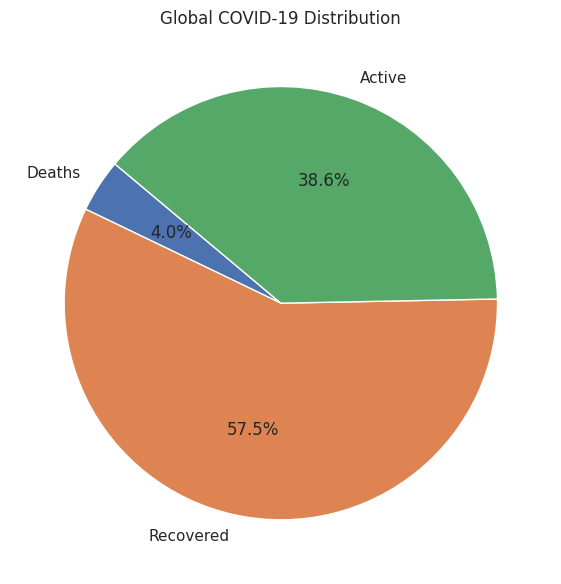

In [ ]:
labels = ['Deaths','Recovered','Active']
sizes = [
    total_deaths,
    total_recovered,
    total_confirmed - (total_deaths + total_recovered)
]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Global COVID-19 Distribution')
plt.tight_layout(); plt.show()
